Checking for null values:
 MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64


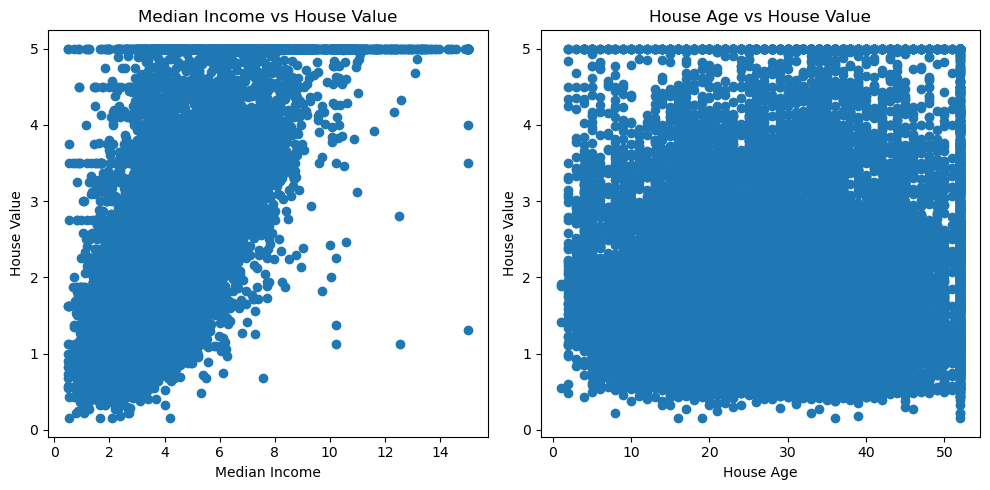

RMSE scores from 5-fold cross-validation: [0.72115555 0.70872616 0.7214877  0.71266905 0.73859747]
Mean Squared Error on the test set: 0.5558915986952444


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Load the dataset
data = fetch_california_housing()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

print("Checking for null values:\n", X.isnull().sum())

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.scatter(X['MedInc'], y)
plt.title('Median Income vs House Value')
plt.xlabel('Median Income')
plt.ylabel('House Value')

plt.subplot(1, 2, 2)
plt.scatter(X['HouseAge'], y)
plt.title('House Age vs House Value')
plt.xlabel('House Age')
plt.ylabel('House Value')

plt.tight_layout()
plt.show()

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression Model
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#  5-fold cross-validation
cv_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
rmse_scores = np.sqrt(-cv_scores)
print("RMSE scores from 5-fold cross-validation:", rmse_scores)

# Calculate the Mean Squared Error on the test set as a final performance metric
y_pred = lin_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on the test set:", mse)
